In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
import pandas as pd
data = pd.read_csv('credit_new.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    30000 non-null  int64
 1   SEX           30000 non-null  int64
 2   EDUCATION     30000 non-null  int64
 3   MARRIAGE      30000 non-null  int64
 4   Trend_SEP     30000 non-null  int64
 5   Trend_AUG     30000 non-null  int64
 6   Trend_JUL     30000 non-null  int64
 7   Trend_JUN     30000 non-null  int64
 8   Trend_MAY     30000 non-null  int64
 9   Trend_APR     30000 non-null  int64
 10  BILL_AMT1     30000 non-null  int64
 11  BILL_AUG      30000 non-null  int64
 12  BILL_JUL      30000 non-null  int64
 13  BILL_JUN      30000 non-null  int64
 14  BILL_MAY      30000 non-null  int64
 15  BILL_AMT6     30000 non-null  int64
 16  BILL_SEP      30000 non-null  int64
 17  PAY_AUG       30000 non-null  int64
 18  PAY_JUL       30000 non-null  int64
 19  PAY_JUN       30000 non-n

In [4]:
data = data.rename(columns = {"BILL_AMT1": "BILL_SEP"})
data = data.rename(columns = {"BILL_AMT2": "BILL_AUG"})
data = data.rename(columns = {"BILL_AMT3": "BILL_JUL"})
data = data.rename(columns = {"BILL_AMT4": "BILL_JUN"})
data = data.rename(columns = {"BILL_AMT5": "BILL_MAY"})
data = data.rename(columns = {"BILL_AMT6": "BILL_APR"})

In [5]:
data.drop(["Unnamed: 0"], axis=1, inplace= True)

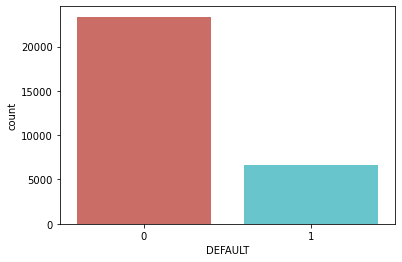

In [6]:
sb.countplot(x='DEFAULT',data=data, palette='hls')

# Logistic Regression Model

In [7]:
# X Data
X = data.drop(columns =["DEFAULT"])
X

,SEX,EDUCATION,MARRIAGE,Trend_SEP,Trend_AUG,Trend_JUL,Trend_JUN,Trend_MAY,Trend_APR,BILL_SEP,...,BILL_MAY,BILL_APR,BILL_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,CREDIT_Range,AGE_Range
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,689,0,0,0,0,0,1
1,2,2,2,-1,2,0,0,0,2,2682,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,2,2,2,0,0,0,0,0,0,29239,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
3,2,2,1,0,0,0,0,0,0,46990,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,1,2,1,-1,0,-1,0,0,0,8617,...,19146,19131,2000,36681,10000,9000,689,679,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0,188948,...,31237,15980,8500,20000,5003,3047,5000,1000,2,2
29996,1,3,2,-1,-1,-1,-1,0,0,1683,...,5190,0,1837,3526,8998,129,0,0,1,2
29997,1,2,2,4,3,2,-1,0,0,3565,...,20582,19357,0,0,22000,4200,2000,3100,0,2
29998,1,3,1,1,-1,0,0,0,-1,-1645,...,11855,48944,85900,3409,1178,1926,52964,1804,0,2


In [8]:
# Y DATA
Y = data["DEFAULT"]
Y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25, random_state=25)

# Deploying the model

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred=logreg.predict(X_test)

In [12]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

In [13]:
cnf_matrix

array([[5757,   60],
       [1561,  122]])

In [14]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5817
           1       0.67      0.07      0.13      1683

    accuracy                           0.78      7500
   macro avg       0.73      0.53      0.50      7500
weighted avg       0.76      0.78      0.71      7500



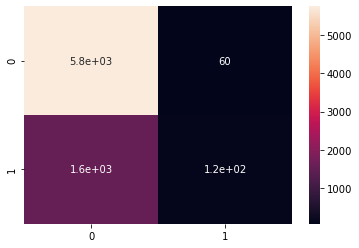

In [15]:
import seaborn as sn
sn.heatmap(cnf_matrix, annot=True)

Three true negative predictions: The first three observations are zeros predicted correctly.

No false negative predictions: These are the ones wrongly predicted as zeros.

One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.

Six true positive predictions: The last six observations are ones predicted correctly.

In [16]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.7838666666666667
Precision: 0.6703296703296703
Recall: 0.07248960190136661


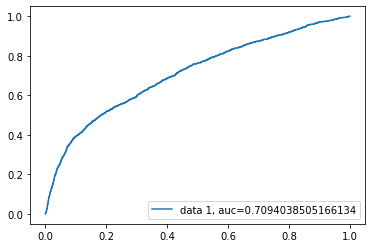

In [17]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [19]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)



In [20]:
# fitting the model for grid search 
LR_search.fit(X_train , Y_train)
LR_search.best_params_

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' p

[CV]  C=0.001, max_iter=100, penalty=l1, solver=liblinear, score=0.793, total=   0.4s
[CV] C=0.001, max_iter=100, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=liblinear, score=0.793, total=   0.4s
[CV] C=0.001, max_iter=100, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=liblinear, score=0.788, total=   0.4s
[CV] C=0.001, max_iter=100, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=100, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=100, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=sag, score=nan, to

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.001, max_iter=100, penalty=l1, solver=saga, score=0.784, total=   0.8s
[CV] C=0.001, max_iter=100, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l1, solver=saga, score=0.785, total=   0.8s
[CV] C=0.001, max_iter=100, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l1, solver=saga, score=0.781, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l1, solver=saga, score=0.783, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l1, solver=saga, score=0.782, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.807, total=   0.8s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.803, total=   0.8s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.800, total=   0.8s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.802, total=   0.8s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.806, total=   0.8s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.2s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.2s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.781, total=   0.2s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.783, total=   0.2s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.789, total=   0.2s
[CV] C=0.001, max_iter=100, penalty=l2, solver=liblinear .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.001, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.2s
[CV] C=0.001, max_iter=100, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=liblinear, score=0.785, total=   0.4s
[CV] C=0.001, max_iter=100, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=liblinear, score=0.782, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=liblinear, score=0.789, total=   0.5s
[CV] C=0.001, max_iter=100, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=liblinear, score=0.782, total=   0.3s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.784, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.785, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.781, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.783, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.782, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.784, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.785, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.781, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.783, total=   0.7s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.782, total=   0.6s
[CV] C=0.001, max_iter=200, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l1, solver=lbfgs, score=nan, total= 

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.784, total=   1.4s
[CV] C=0.001, max_iter=200, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.785, total=   1.4s
[CV] C=0.001, max_iter=200, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.781, total=   1.4s
[CV] C=0.001, max_iter=200, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.783, total=   1.3s
[CV] C=0.001, max_iter=200, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.782, total=   1.3s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.805, total=   1.7s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.803, total=   1.5s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.800, total=   1.8s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.803, total=   1.8s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.804, total=   2.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.797, total=   0.3s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.794, total=   0.3s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.793, total=   0.2s
[CV] C=0.001, max_iter=200, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=200, penalty=l2, solver=liblinear, score=0.784, total=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.784, total=   1.3s
[CV] C=0.001, max_iter=200, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.785, total=   1.3s
[CV] C=0.001, max_iter=200, penalty=l2, solver=sag ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.781, total=   1.2s
[CV] C=0.001, max_iter=200, penalty=l2, solver=sag ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.783, total=   1.2s
[CV] C=0.001, max_iter=200, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.782, total=   0.8s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.784, total=   1.2s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.785, total=   1.2s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.781, total=   1.2s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.783, total=   1.2s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.782, total=   1.2s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total= 

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.784, total=   2.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.785, total=   1.9s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.781, total=   2.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.783, total=   1.9s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.805, total=   1.7s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.803, total=   1.5s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.800, total=   1.8s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.803, total=   1.7s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.804, total=   2.0s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.797, total=   0.2s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.794, total=   0.3s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.793, total=   0.2s
[CV] C=0.001, max_iter=300, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=300, penalty=l2, solver=liblinear, score=0.784, total=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.784, total=   1.8s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.785, total=   1.7s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.781, total=   1.7s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.783, total=   1.7s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.001, max_iter=400, penalty=l1, solver=liblinear, score=0.793, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=liblinear, score=0.793, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=liblinear, score=0.788, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=400, penalty=l1, solver=sag, score=nan, to

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.784, total=   2.5s
[CV] C=0.001, max_iter=400, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=0.001, max_iter=400, penalty=l1, solver=saga ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.781, total=   2.5s
[CV] C=0.001, max_iter=400, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.001, max_iter=400, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.805, total=   1.7s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.803, total=   1.5s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.800, total=   1.8s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.803, total=   1.8s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.804, total=   2.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.797, total=   0.2s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.794, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.793, total=   0.2s
[CV] C=0.001, max_iter=400, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=400, penalty=l2, solver=liblinear, score=0.784, total=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.001, max_iter=400, penalty=l2, solver=saga, score=0.781, total=   2.3s
[CV] C=0.001, max_iter=400, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=saga, score=0.783, total=   2.2s
[CV] C=0.001, max_iter=400, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.001, max_iter=500, penalty=l1, solver=liblinear, score=0.793, total=   0.4s
[CV] C=0.001, max_iter=500, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=liblinear, score=0.793, total=   0.4s
[CV] C=0.001, max_iter=500, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=liblinear, score=0.788, total=   0.3s
[CV] C=0.001, max_iter=500, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=500, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=500, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=sag, score=nan, to

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.784, total=   2.5s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.785, total=   2.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.781, total=   2.5s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.805, total=   1.7s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.803, total=   1.5s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.800, total=   1.8s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.803, total=   1.8s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.804, total=   2.0s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.797, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.794, total=   0.3s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.793, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=500, penalty=l2, solver=liblinear, score=0.784, total=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.001, max_iter=600, penalty=l1, solver=liblinear, score=0.793, total=   0.4s
[CV] C=0.001, max_iter=600, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=liblinear, score=0.793, total=   0.4s
[CV] C=0.001, max_iter=600, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=liblinear, score=0.788, total=   0.3s
[CV] C=0.001, max_iter=600, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=liblinear, score=0.792, total=   0.4s
[CV] C=0.001, max_iter=600, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=600, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=sag, score=nan, to

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=0.001, max_iter=600, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=0.001, max_iter=600, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.781, total=   2.7s
[CV] C=0.001, max_iter=600, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.783, total=   2.6s
[CV] C=0.001, max_iter=600, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.805, total=   1.7s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.803, total=   1.6s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.800, total=   2.0s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.803, total=   1.9s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.804, total=   2.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.797, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.794, total=   0.3s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.793, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=600, penalty=l2, solver=liblinear, score=0.784, total=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.001, max_iter=700, penalty=l1, solver=liblinear, score=0.793, total=   0.4s
[CV] C=0.001, max_iter=700, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=700, penalty=l1, solver=liblinear, score=0.793, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=700, penalty=l1, solver=liblinear, score=0.788, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=700, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l1, solver=liblinear .............
[CV]  C=0.001, max_iter=700, penalty=l1, solver=liblinear, score=0.792, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=700, penalty=l1, solver=sag, score=nan, to

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=0.001, max_iter=700, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.785, total=   2.4s
[CV] C=0.001, max_iter=700, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=0.001, max_iter=700, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.001, max_iter=700, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.805, total=   1.7s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.803, total=   1.6s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.800, total=   1.9s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.803, total=   1.9s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.804, total=   2.1s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.797, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.794, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.793, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=700, penalty=l2, solver=liblinear, score=0.784, total=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.802, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.809, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.784, total=   0.7s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.785, total=   0.7s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.781, total=   0.7s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.783, total=   0.7s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.782, total=   0.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.811, total=   0.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.803, total=   0.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.808, total=   0.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.785, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.779, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.793, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, score=0.785, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, score=0.795, total=   0.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, score=0.792, t

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.784, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.785, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.781, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.783, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.782, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.784, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.785, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.781, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.783, total=   0.6s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.782, total=   0.6s
[CV] C=0.01, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l1, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l1, solver=lbfgs, score=nan, total=   0.0s


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.784, total=   1.4s
[CV] C=0.01, max_iter=200, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.785, total=   1.3s
[CV] C=0.01, max_iter=200, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.781, total=   1.3s
[CV] C=0.01, max_iter=200, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.783, total=   1.3s
[CV] C=0.01, max_iter=200, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.782, total=   1.3s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.809, total=   2.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.806, total=   2.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.809, total=   1.8s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   2.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.794, total=   0.2s
[CV] C=0.01, max_iter=200, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=200, penalty=l2, solver=liblinear, score=0.784, total=   0.3s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.784, total=   1.2s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.785, total=   1.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.781, total=   1.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.783, total=   1.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.782, total=   0.8s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.784, total=   1.2s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.785, total=   1.2s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.781, total=   1.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.783, total=   1.2s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.782, total=   1.2s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total=   0.0s


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.784, total=   2.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.785, total=   1.9s
[CV] C=0.01, max_iter=300, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.781, total=   1.9s
[CV] C=0.01, max_iter=300, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.783, total=   1.9s
[CV] C=0.01, max_iter=300, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.809, total=   2.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.806, total=   2.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.809, total=   1.9s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.810, total=   2.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.794, total=   0.2s
[CV] C=0.01, max_iter=300, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=300, penalty=l2, solver=liblinear, score=0.784, total=   0.3s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.784, total=   1.7s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.785, total=   1.7s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.781, total=   1.7s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.783, total=   1.7s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.01, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.01, max_iter=400, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=400, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=liblinear, score=0.802, total=   0.3s
[CV] C=0.01, max_iter=400, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=400, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.01, max_iter=400, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=400, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=0.01, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=0.01, max_iter=400, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.781, total=   2.5s
[CV] C=0.01, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.01, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.809, total=   2.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.806, total=   2.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.809, total=   1.9s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.810, total=   2.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.794, total=   0.2s
[CV] C=0.01, max_iter=400, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=400, penalty=l2, solver=liblinear, score=0.784, total=   0.3s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.781, total=   2.3s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.783, total=   2.2s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.01, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.01, max_iter=500, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=500, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=liblinear, score=0.802, total=   0.3s
[CV] C=0.01, max_iter=500, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=500, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.01, max_iter=500, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.781, total=   3.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.809, total=   2.1s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.806, total=   2.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.809, total=   1.8s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   2.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.794, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=500, penalty=l2, solver=liblinear, score=0.784, total=   0.3s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.01, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.01, max_iter=600, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=600, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=liblinear, score=0.802, total=   0.3s
[CV] C=0.01, max_iter=600, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=600, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.01, max_iter=600, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=600, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=0.01, max_iter=600, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=0.01, max_iter=600, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=0.01, max_iter=600, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.01, max_iter=600, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.809, total=   2.1s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.806, total=   2.0s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.809, total=   1.9s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.794, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=600, penalty=l2, solver=liblinear, score=0.784, total=   0.3s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.01, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.01, max_iter=700, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=liblinear, score=0.802, total=   0.4s
[CV] C=0.01, max_iter=700, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=liblinear, score=0.809, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=700, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=0.01, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.785, total=   2.5s
[CV] C=0.01, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=0.01, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.01, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.809, total=   2.1s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.806, total=   2.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.809, total=   1.9s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.810, total=   2.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.794, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=700, penalty=l2, solver=liblinear, score=0.784, total=   0.3s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.1, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.784, total=   0.7s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.785, total=   0.7s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.781, total=   0.7s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.783, total=   0.7s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.782, total=   0.7s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.811, total=   0.7s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.8s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.805, total=   0.8s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.806, total=   0.8s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.807, total=   0.8s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.785, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.793, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=liblinear, score=0.785, total=   0.7s
[CV] C=0.1, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=liblinear, score=0.797, total=   0.7s
[CV] C=0.1, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=liblinear, score=0.796, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=liblinear, score=0.791, total=  

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.784, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.785, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.781, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.783, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.782, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.784, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.785, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.781, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.783, total=   0.6s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.782, total=   0.6s
[CV] C=0.1, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l1, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.784, total=   1.4s
[CV] C=0.1, max_iter=200, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.785, total=   1.3s
[CV] C=0.1, max_iter=200, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.781, total=   1.3s
[CV] C=0.1, max_iter=200, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.783, total=   1.3s
[CV] C=0.1, max_iter=200, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.782, total=   1.3s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   1.7s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.812, total=   2.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.1, max_iter=200, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=200, penalty=l2, solver=liblinear, score=0.785, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.784, total=   1.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.785, total=   1.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.781, total=   1.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.783, total=   1.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.782, total=   0.8s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.784, total=   1.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.785, total=   1.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.781, total=   1.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.783, total=   1.2s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.782, total=   1.2s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.784, total=   2.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.785, total=   2.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.781, total=   1.9s
[CV] C=0.1, max_iter=300, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.783, total=   2.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.810, total=   1.7s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   2.3s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=0.1, max_iter=300, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=300, penalty=l2, solver=liblinear, score=0.785, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.784, total=   1.7s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.785, total=   1.7s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.781, total=   1.7s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.783, total=   1.7s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.1, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.1, max_iter=400, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=0.1, max_iter=400, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=0.1, max_iter=400, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.1, max_iter=400, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.1, max_iter=400, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=0.1, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=0.1, max_iter=400, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.781, total=   2.5s
[CV] C=0.1, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.1, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.810, total=   1.7s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.806, total=   2.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   2.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=0.1, max_iter=400, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=400, penalty=l2, solver=liblinear, score=0.785, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.781, total=   2.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.783, total=   2.2s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.1, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.1, max_iter=500, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=0.1, max_iter=500, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=0.1, max_iter=500, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.1, max_iter=500, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.1, max_iter=500, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.785, total=   2.2s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   1.7s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   2.3s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=500, penalty=l2, solver=liblinear, score=0.785, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.1, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.1, max_iter=600, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=0.1, max_iter=600, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=0.1, max_iter=600, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.1, max_iter=600, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.1, max_iter=600, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.784, total=   3.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.785, total=   2.4s
[CV] C=0.1, max_iter=600, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.781, total=   3.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.783, total=   2.9s
[CV] C=0.1, max_iter=600, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.782, total=   1.7s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.810, total=   1.7s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   2.3s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.1, max_iter=600, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=600, penalty=l2, solver=liblinear, score=0.785, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=0.1, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.1, max_iter=700, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=0.1, max_iter=700, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=0.1, max_iter=700, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.784, total=   2.7s
[CV] C=0.1, max_iter=700, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=0.1, max_iter=700, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=0.1, max_iter=700, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=0.1, max_iter=700, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.810, total=   1.7s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   2.3s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=700, penalty=l2, solver=liblinear, score=0.785, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_it

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.784, total=   0.7s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.785, total=   0.7s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.781, total=   0.7s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.783, total=   0.7s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.782, total=   0.7s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.7s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.810, total=   0.8s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.803, total=   0.8s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.806, total=   0.8s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.807, total=   0.8s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.789, total=   0.2s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.781, total=   0.2s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.797, total=   0.2s
[CV] C=1, max_iter=100, penalty=l2, solver=liblinear .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, max_iter=100, penalty=l2, solver=liblinear, score=0.795, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l2, solver=liblinear, score=0.797, total=   0.7s
[CV] C=1, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l2, solver=liblinear, score=0.781, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l2, solver=liblinear, score=0.783, total=   0.5s
[CV] C=1, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l2, solver=liblinear, score=0.785, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.784, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.785, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.781, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.783, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.782, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.784, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.785, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.781, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.783, total=   0.6s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.782, total=   0.6s
[CV] C=1, max_iter=200, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=200, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=200, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=200, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=200, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=200, penalty=l1, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=20

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.784, total=   1.3s
[CV] C=1, max_iter=200, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.785, total=   1.4s
[CV] C=1, max_iter=200, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.781, total=   1.3s
[CV] C=1, max_iter=200, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.783, total=   1.3s
[CV] C=1, max_iter=200, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.782, total=   1.3s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.812, total=   2.2s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1, max_iter=200, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=200, penalty=l2, solver=liblinear, score=0.795, total=   0.6s
[CV] C=1, max_iter=2

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.784, total=   1.2s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.785, total=   1.1s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.781, total=   1.3s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.783, total=   1.2s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.782, total=   0.8s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.784, total=   1.2s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.785, total=   1.2s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.781, total=   1.2s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.783, total=   1.2s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.782, total=   1.2s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=30

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.784, total=   2.0s
[CV] C=1, max_iter=300, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.785, total=   2.0s
[CV] C=1, max_iter=300, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.781, total=   1.9s
[CV] C=1, max_iter=300, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.783, total=   1.9s
[CV] C=1, max_iter=300, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.812, total=   2.2s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1, max_iter=300, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=300, penalty=l2, solver=liblinear, score=0.795, total=   0.6s
[CV] C=1, max_iter=3

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.784, total=   1.7s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.785, total=   1.7s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.781, total=   1.8s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.783, total=   1.7s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=4

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1, max_iter=400, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=1, max_iter=400, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=400, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=1, max_iter=400, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=400, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=1, max_iter=400, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=400, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1, max_iter=400, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=400, penalty=l1, solver=liblinear, score=0.812, total=   0.4s
[CV] C=1, max_iter=400, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_it

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.784, total=   3.1s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.812, total=   2.2s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1, max_iter=400, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=400, penalty=l2, solver=liblinear, score=0.795, total=   0.6s
[CV] C=1, max_iter=4

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.781, total=   2.3s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.783, total=   2.3s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.782, total=   1.4s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=500,

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1, max_iter=500, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=1, max_iter=500, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=500, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=1, max_iter=500, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=500, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=1, max_iter=500, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=500, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1, max_iter=500, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=500, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1, max_iter=500, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=500, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_it

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=1, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=1, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=1, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=1, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.812, total=   2.2s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=500, penalty=l2, solver=liblinear, score=0.795, total=   0.6s
[CV] C=1, max_iter=5

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1, max_iter=600, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=1, max_iter=600, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=600, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=1, max_iter=600, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=600, penalty=l1, solver=liblinear, score=0.806, total=   0.2s
[CV] C=1, max_iter=600, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=600, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1, max_iter=600, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=600, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1, max_iter=600, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_it

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.784, total=   2.7s
[CV] C=1, max_iter=600, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.785, total=   2.2s
[CV] C=1, max_iter=600, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=1, max_iter=600, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.783, total=   2.9s
[CV] C=1, max_iter=600, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.812, total=   2.2s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=600, penalty=l2, solver=liblinear, score=0.795, total=   0.6s
[CV] C=1, max_iter=6

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1, max_iter=700, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=1, max_iter=700, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=700, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=1, max_iter=700, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=700, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=1, max_iter=700, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=700, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1, max_iter=700, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=700, penalty=l1, solver=liblinear, score=0.812, total=   0.4s
[CV] C=1, max_iter=700, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=700, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_it

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.784, total=   2.7s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.781, total=   2.7s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.783, total=   2.9s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.812, total=   2.2s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.790, total=   0.3s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=700, penalty=l2, solver=liblinear, score=0.795, total=   0.6s
[CV] C=1, max_iter=7

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=10, max_iter=100, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=10, max_iter=100, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=10, max_iter=100, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=10, max_iter=100, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=10, max_iter=100, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.784, total=   0.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.785, total=   0.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.781, total=   0.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.783, total=   0.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.782, total=   0.7s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.8s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.8s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.804, total=   0.8s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.811, total=   0.8s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.807, total=   0.8s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.785, total=   0.2s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.787, total=   0.2s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.4s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l2, solver=liblinear, score=0.808, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l2, solver=liblinear, score=0.791, total=   0.7s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.5s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.784, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.785, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.781, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.783, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.782, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.784, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.785, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.781, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.783, total=   0.6s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.782, total=   0.6s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=200, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.784, total=   1.4s
[CV] C=10, max_iter=200, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.785, total=   1.3s
[CV] C=10, max_iter=200, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.781, total=   1.3s
[CV] C=10, max_iter=200, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.783, total=   1.3s
[CV] C=10, max_iter=200, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.782, total=   1.3s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   2.3s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.806, total=   2.3s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=10, max_iter=200, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=200, penalty=l2, solver=liblinear, score=0.784, total=   0.4s
[CV] C=10, ma

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.784, total=   1.2s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.785, total=   1.1s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.781, total=   1.2s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.783, total=   1.2s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.782, total=   0.8s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.784, total=   1.2s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.785, total=   1.2s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.781, total=   1.2s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.783, total=   1.2s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.782, total=   1.2s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=300, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.784, total=   2.3s
[CV] C=10, max_iter=300, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.785, total=   2.0s
[CV] C=10, max_iter=300, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.781, total=   1.9s
[CV] C=10, max_iter=300, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.783, total=   2.0s
[CV] C=10, max_iter=300, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.810, total=   2.3s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.806, total=   2.3s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=10, max_iter=300, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=300, penalty=l2, solver=liblinear, score=0.784, total=   0.4s
[CV] C=10, ma

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.784, total=   1.8s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.785, total=   1.7s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.781, total=   1.7s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.783, total=   1.7s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.782, total=   1.4s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, ma

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=10, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=10, max_iter=400, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=400, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=10, max_iter=400, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=400, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=10, max_iter=400, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=10, max_iter=400, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=400, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=10, max_iter=400, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=10, max_iter=400, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=10, max_iter=400, penalty=l1, solver=saga .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=10, max_iter=400, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=10, max_iter=400, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=10, max_iter=400, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=400, penalty=l2, solver=liblinear, score=0.784, total=   0.4s
[CV] C=10, ma

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.781, total=   2.3s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.783, total=   2.2s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_i

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=10, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=10, max_iter=500, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=500, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=10, max_iter=500, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=500, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=10, max_iter=500, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=10, max_iter=500, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=500, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=10, max_iter=500, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.781, total=   2.5s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.806, total=   2.3s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=500, penalty=l2, solver=liblinear, score=0.784, total=   0.4s
[CV] C=10, ma

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=10, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=10, max_iter=600, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=600, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=10, max_iter=600, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=600, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=10, max_iter=600, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=10, max_iter=600, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=600, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=10, max_iter=600, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.810, total=   2.3s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=600, penalty=l2, solver=liblinear, score=0.784, total=   0.4s
[CV] C=10, ma

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=10, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=10, max_iter=700, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=700, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=10, max_iter=700, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=700, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=10, max_iter=700, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=10, max_iter=700, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=700, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=10, max_iter=700, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=700, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=10, max_iter=700, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=10, max_iter=700, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=10, max_iter=700, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=10, max_iter=700, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.810, total=   2.3s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   1.8s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=700, penalty=l2, solver=liblinear, score=0.784, total=   0.4s
[CV] C=10, ma

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=100, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=100, max_iter=100, penalty=l1, solver=saga, score=0.784, total=   0.7s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l1, solver=saga, score=0.785, total=   0.7s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l1, solver=saga, score=0.781, total=   0.7s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l1, solver=saga, score=0.783, total=   0.7s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l1, solver=saga, score=0.782, total=   0.7s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.811, total=   0.7s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.8s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.803, total=   0.8s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.806, total=   0.8s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.8s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.785, total=   0.2s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.785, total=   0.2s
[CV] C=100, max_iter=100, penalty=l2, solver=liblinear ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=100, max_iter=100, penalty=l2, solver=liblinear, score=0.800, total=   0.7s
[CV] C=100, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l2, solver=liblinear, score=0.785, total=   0.4s
[CV] C=100, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l2, solver=liblinear, score=0.787, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l2, solver=liblinear, score=0.785, total=   0.7s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.784, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.785, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.781, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.783, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.782, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.784, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.785, total=   0.7s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.781, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.783, total=   0.6s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.782, total=   0.6s
[CV] C=100, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=200, penalty=l1, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.784, total=   1.3s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.785, total=   1.3s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.781, total=   1.3s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.783, total=   1.3s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.782, total=   1.3s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.806, total=   2.3s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   2.2s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.812, total=   2.3s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=100, max_iter=200, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=200, penalty=l2, solver=liblinear, score=0.800, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.784, total=   1.1s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.785, total=   1.1s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.781, total=   1.1s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.783, total=   1.2s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.782, total=   0.8s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.784, total=   1.2s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.785, total=   1.3s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.781, total=   1.2s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.783, total=   1.2s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.782, total=   1.2s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.784, total=   2.0s
[CV] C=100, max_iter=300, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.785, total=   1.9s
[CV] C=100, max_iter=300, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.781, total=   2.0s
[CV] C=100, max_iter=300, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.783, total=   2.0s
[CV] C=100, max_iter=300, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.810, total=   2.3s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   2.3s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.812, total=   2.5s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=100, max_iter=300, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=300, penalty=l2, solver=liblinear, score=0.800, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.784, total=   1.7s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.785, total=   1.7s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.781, total=   1.7s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.783, total=   1.7s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.782, total=   1.4s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=100, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=100, max_iter=400, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=100, max_iter=400, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=100, max_iter=400, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=100, max_iter=400, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=100, max_iter=400, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=100, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=100, max_iter=400, penalty=l1, solver=saga ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.781, total=   2.5s
[CV] C=100, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=100, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.810, total=   2.3s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   2.2s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.812, total=   2.4s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=100, max_iter=400, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=400, penalty=l2, solver=liblinear, score=0.800, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.781, total=   2.3s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.783, total=   2.3s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.782, total=   1.3s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=100, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=100, max_iter=500, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=100, max_iter=500, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=100, max_iter=500, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=100, max_iter=500, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=100, max_iter=500, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=100, max_iter=500, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   2.2s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.812, total=   2.5s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=100, max_iter=500, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=500, penalty=l2, solver=liblinear, score=0.800, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=100, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=100, max_iter=600, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=100, max_iter=600, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=100, max_iter=600, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=100, max_iter=600, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=liblinear, score=0.812, total=   0.2s
[CV] C=100, max_iter=600, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=100, max_iter=600, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=100, max_iter=600, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=100, max_iter=600, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.783, total=   2.8s
[CV] C=100, max_iter=600, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   2.3s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.806, total=   2.2s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   2.2s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.812, total=   2.4s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=100, max_iter=600, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=600, penalty=l2, solver=liblinear, score=0.800, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=100, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=100, max_iter=700, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=700, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=100, max_iter=700, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=700, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=100, max_iter=700, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=100, max_iter=700, penalty=l1, solver=liblinear ...............
[CV]  C=100, max_iter=700, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=100, max_iter=700, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=100, max_iter=700, penalty=l1, solver=sag .....................
[CV]  C=100, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=100, max_iter=700, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.785, total=   2.2s
[CV] C=100, max_iter=700, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=100, max_iter=700, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=100, max_iter=700, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.810, total=   2.3s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.806, total=   2.3s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   2.2s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.812, total=   2.5s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=100, max_iter=700, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=700, penalty=l2, solver=liblinear, score=0.800, total=   0.7s
[CV] C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1000, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=1000, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=liblinear, score=0.810, total=   0.4s
[CV] C=1000, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=1000, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=1000, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1000, max_iter=100, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=100, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.784, total=   0.7s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.785, total=   0.7s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.781, total=   0.7s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.783, total=   0.7s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.782, total=   0.8s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.811, total=   0.7s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.8s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.805, total=   0.8s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.806, total=   0.8s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.810, total=   0.8s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.785, total=   0.2s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.794, total=   0.2s
[CV] C=1000, max_iter=100, penalty=l2, solver=liblinear ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1000, max_iter=100, penalty=l2, solver=liblinear, score=0.797, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l2, solver=liblinear, score=0.787, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l2, solver=liblinear, score=0.786, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l2, solver=liblinear, score=0.784, total=   0.2s
[CV] C=1000, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l2, solver=liblinear, score=0.788, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.784, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.785, total=   0.7s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.781, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.783, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.782, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.784, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.785, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.781, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.783, total=   0.6s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.782, total=   0.6s
[CV] C=1000, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l1, solver=lbfgs, score=nan, total=   0.0s


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.784, total=   1.4s
[CV] C=1000, max_iter=200, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.785, total=   1.3s
[CV] C=1000, max_iter=200, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.781, total=   1.3s
[CV] C=1000, max_iter=200, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.783, total=   1.3s
[CV] C=1000, max_iter=200, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.782, total=   1.3s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.806, total=   2.3s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.812, total=   1.9s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1000, max_iter=200, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=200, penalty=l2, solver=liblinear, score=0.797, total=   0.6s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.784, total=   1.2s
[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.785, total=   1.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.781, total=   1.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.783, total=   1.2s
[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.782, total=   0.8s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.784, total=   1.2s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.785, total=   1.2s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.781, total=   1.2s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.783, total=   1.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.782, total=   1.2s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total=   0.0s


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.784, total=   2.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.785, total=   2.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.781, total=   1.9s
[CV] C=1000, max_iter=300, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.783, total=   2.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.806, total=   2.4s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.812, total=   1.9s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1000, max_iter=300, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=300, penalty=l2, solver=liblinear, score=0.797, total=   0.6s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.784, total=   1.9s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.785, total=   1.7s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.781, total=   1.7s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.783, total=   1.7s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.782, total=   1.4s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1000, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=1000, max_iter=400, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=1000, max_iter=400, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=1000, max_iter=400, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=1000, max_iter=400, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1000, max_iter=400, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=400, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=400, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.781, total=   2.8s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.783, total=   2.7s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.782, total=   1.7s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.806, total=   2.5s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.811, total=   2.3s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.812, total=   2.0s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.795, total=   0.3s
[CV] C=1000, max_iter=400, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=400, penalty=l2, solver=liblinear, score=0.797, total=   0.7s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000, max_iter=400, penalty=l2, solver=saga, score=0.781, total=   2.3s
[CV] C=1000, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l2, solver=saga, score=0.783, total=   2.3s
[CV] C=1000, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l2, solver=saga, score=0.782, total=   1.4s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1000, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=1000, max_iter=500, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=1000, max_iter=500, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=1000, max_iter=500, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=1000, max_iter=500, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1000, max_iter=500, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=500, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.783, total=   2.5s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   2.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.806, total=   2.4s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.812, total=   1.9s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=500, penalty=l2, solver=liblinear, score=0.797, total=   0.6s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1000, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=1000, max_iter=600, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=1000, max_iter=600, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=liblinear, score=0.806, total=   0.3s
[CV] C=1000, max_iter=600, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=1000, max_iter=600, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1000, max_iter=600, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=600, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=600, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=1000, max_iter=600, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.785, total=   2.1s
[CV] C=1000, max_iter=600, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.781, total=   2.6s
[CV] C=1000, max_iter=600, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.783, total=   2.4s
[CV] C=1000, max_iter=600, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   2.0s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.806, total=   2.4s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.812, total=   1.9s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=600, penalty=l2, solver=liblinear, score=0.797, total=   0.6s

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

[CV]  C=1000, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.4s
[CV] C=1000, max_iter=700, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=liblinear, score=0.810, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=liblinear, score=0.806, total=   0.4s
[CV] C=1000, max_iter=700, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=liblinear, score=0.811, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l1, solver=liblinear ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=liblinear, score=0.812, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=700, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=700, penalty=l1, solver=sag, score=nan, total=   

/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this tra

[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.784, total=   2.6s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.785, total=   2.0s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.781, total=   2.5s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.783, total=   2.7s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.782, total=   1.5s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   1.9s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.810, total=   2.1s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.806, total=   2.4s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.811, total=   2.1s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mercadeoalcci/opt/anaconda3/lib/python3.8/site-packages/scipy/optimiz

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.812, total=   1.9s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.796, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=700, penalty=l2, solver=liblinear, score=0.797, total=   0.6s

[Parallel(n_jobs=1)]: Done 2450 out of 2450 | elapsed: 30.8min finished


{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [21]:
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Mean Accuracy: 0.810
Config: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
